In [2]:
# All tickets for Sponsor 31
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=closed&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&sponsor=%5ESponsor31-can&or&sponsor=%5ESponsor31-must&col=id&col=summary&col=sponsor&col=status&col=owner&col=type&col=priority&col=milestone&col=component&col=version&col=resolution&col=changetime&col=actualpoints&col=points&col=keywords&order=priority

# I NEED TO FILTER BY network-roadmap keyword but still not doing it because not all tickets in the roadmap are tagged

csv_path='/Users/gaba/Code/torproject/trac/datasets/S31_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)

In [3]:
open_tickets = csv_file.query('Status!="closed"')
close_tickets = csv_file.query('Status=="closed"')

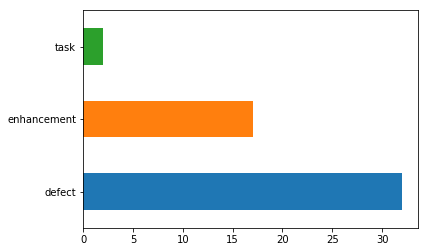

In [3]:
################################## FOR CLOSED TICKETS ##################################

# which type of tickets were closed
close_tickets['Type'].value_counts().plot.barh()

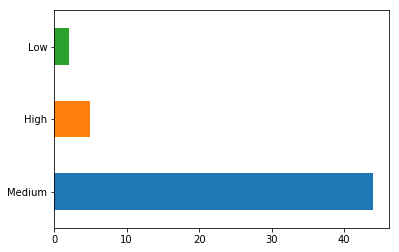

In [4]:
close_tickets['Priority'].value_counts().plot.barh()

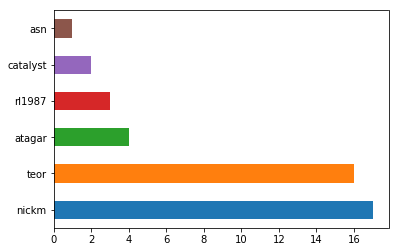

In [5]:
# who completed them
close_tickets['Owner'].value_counts().plot.barh()


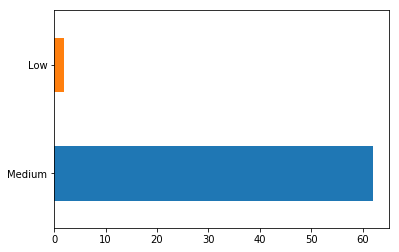

In [6]:
################################## FOR OPEN TICKETS ##################################
# how is the priority on open tickets
open_tickets['Priority'].value_counts().plot.barh()

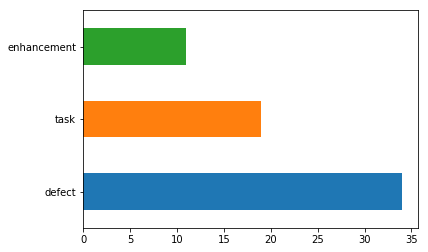

In [7]:
# which type of tickets
open_tickets['Type'].value_counts().plot.barh()

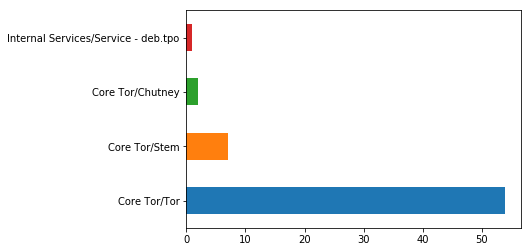

In [8]:

# which components we are changing
open_tickets['Component'].value_counts().plot.barh()

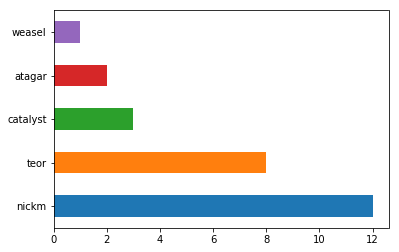

In [9]:
# who is assigned
open_tickets['Owner'].value_counts().plot.barh()


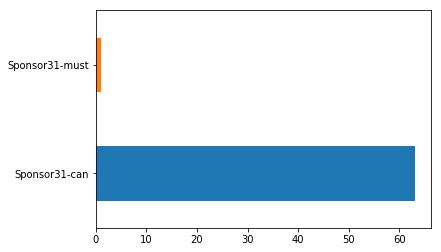

In [10]:
# how many must tickets versus 'can be done'
open_tickets['Sponsor'].value_counts().plot.barh()

In [13]:
open_tickets.query('Sponsor=="Sponsor31-must"')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Modified,Actual Points,Points,Reviewer,Reporter
25,29223,List canonical abbreviations to use in Tor fun...,Sponsor31-must,needs_review,nickm,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,16 may. 2019 15:59:35,0.9,1.0,catalyst,nickm


In [11]:
# how many sponsor31-must tickets are already done and how many still need to be finish
csv_file.query('Sponsor=="Sponsor31-must"')['Status'].value_counts()


closed          3
needs_review    1
Name: Status, dtype: int64

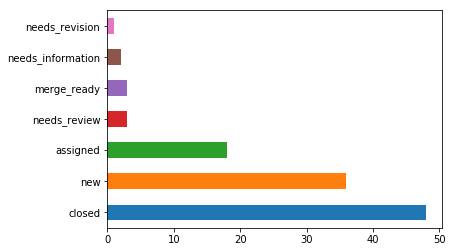

In [14]:
# what about the 'could be done' tickets
csv_file.query('Sponsor=="Sponsor31-can"')['Status'].value_counts().plot.barh()

In [15]:
# are all of the open tickets estimated?
csv_file[csv_file.Points.isnull()].query('Status!="closed"')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Modified,Actual Points,Points,Reviewer,Reporter
5,25493,Improve patterns for cleaning up static variab...,Sponsor31-can,new,NaN,enhancement,Medium,Tor: unspecified,Core Tor/Tor,Normal,NaN,15 ene. 2019 18:36:07,NaN,NaN,NaN,nickm
6,25950,"Run ""accounting_run_housekeeping"" with a perio...",Sponsor31-can,assigned,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,Normal,NaN,17 jun. 2019 19:10:34,NaN,NaN,NaN,nickm
10,29133,Refactor dirserv_read_measured_bandwidths,Sponsor31-can,assigned,teor,defect,Medium,Tor: unspecified,Core Tor/Tor,Normal,NaN,17 jun. 2019 13:19:13,NaN,NaN,NaN,teor
32,29656,describe global initialization in our tinytest...,Sponsor31-can,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,Normal,NaN,4 mar. 2019 18:34:33,NaN,NaN,NaN,catalyst
33,29746,Improve Tor best practices tracker,Sponsor31-can,new,NaN,defect,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,30 may. 2019 16:49:53,NaN,NaN,NaN,asn
41,29895,avoid storing ints in void* in mainloop event ...,Sponsor31-can,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,Normal,NaN,25 mar. 2019 20:38:55,NaN,NaN,NaN,catalyst
59,30243,"Stem's tests use fixed ports for tor, which ma...",Sponsor31-can,new,atagar,defect,Medium,NaN,Core Tor/Stem,Normal,NaN,30 may. 2019 10:01:18,NaN,NaN,NaN,teor
60,30257,Propagate USR1 and ABRT signals from stem test...,Sponsor31-can,new,atagar,defect,Medium,Tor: 0.2.9.x-final,Core Tor/Stem,Normal,NaN,10 jun. 2019 09:53:18,NaN,NaN,NaN,teor
63,30292,Refactor periodic event system so each subsyst...,Sponsor31-can,assigned,nickm,enhancement,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,16 may. 2019 15:58:10,NaN,NaN,NaN,nickm
79,30651,Make stem's Travis jobs log controller message...,Sponsor31-can,assigned,teor,enhancement,Medium,NaN,Core Tor/Stem,Normal,NaN,30 may. 2019 09:45:57,NaN,NaN,NaN,teor


In [16]:
# which ones are the big tickets?
open_tickets.query('Points>6')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Modified,Actual Points,Points,Reviewer,Reporter
11,29209,Reduce visibility of more data type internals,Sponsor31-can,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,16 may. 2019 15:58:10,3.5,15.0,nickm,nickm
12,29210,Distribute control.c functionality across vari...,Sponsor31-can,assigned,catalyst,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,14 jun. 2019 18:30:06,NaN,10.0,NaN,nickm
13,29211,Distribute config.c functionality across more ...,Sponsor31-can,assigned,nickm,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,13 jun. 2019 15:52:52,NaN,15.0,NaN,nickm
14,29212,Create more modularity inside src/core,Sponsor31-can,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,15 may. 2019 23:38:48,NaN,15.0,NaN,nickm
15,29213,Minimize the boundary between src/core and src...,Sponsor31-can,new,NaN,defect,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,9 abr. 2019 18:22:56,NaN,15.0,NaN,nickm
24,29222,Fix biggest violations of coding best-practices,Sponsor31-can,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,9 abr. 2019 18:22:56,NaN,10.0,NaN,nickm
27,29225,Improve efficiency and flexibility of threadpo...,Sponsor31-can,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,9 abr. 2019 18:22:56,NaN,15.0,NaN,nickm
29,29227,"Audit Tor roles (relay, bridge, etc) and remov...",Sponsor31-can,new,NaN,defect,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,9 abr. 2019 18:22:56,NaN,15.0,NaN,nickm
30,29228,Unify some or all of Tor's various message/eve...,Sponsor31-can,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,9 abr. 2019 18:22:56,NaN,10.0,NaN,nickm


In [19]:
# how many points still need to be done
points_to_go = open_tickets.filter(['Points']).sum()

points_to_go/3  # thinking 3 days per week for 1 developer

# starting June: we have until december:  24 semanas  
# ---> We will need at least 2.5 developers to complete 48 weeks of tickets in this sponsor
# ---> There are -12 points

Points    59.7
dtype: float64

In [14]:
# how long the review tickets have been last modified

open_tickets.query('Status=="needs_review"').filter(['id', 'Summary','Modified', 'Owner', 'Reviewer'])

,id,Summary,Modified,Owner,Reviewer
1,31442,Raise rustc minimum version,19 ago. 2019 18:13:42,Sebastian,nickm
11,31240,Make confparse able to handle multiple config_...,12 ago. 2019 16:56:56,nickm,teor
28,30935,Move variable definition code out of confparse...,27 jul. 2019 01:55:55,nickm,teor
29,30914,Move struct manipulation code out of confparse.c,20 ago. 2019 18:12:17,nickm,teor
144,31314,Modify git-merge-forward.sh so it can create t...,20 ago. 2019 14:22:31,teor,asn
